Este código se ejecutará en una computadora quántica de IBM

Nota: Esta forma de usar el provider está deprecada y probablemente se necesite cambiar pronto

In [9]:
import numpy as np
from math import sqrt, pi

from qiskit_ibm_provider import IBMProvider # Para correr en los simuladores y computadoras de la nube
from qiskit import * # Tremendo import all XD
from qiskit.visualization import plot_histogram

In [4]:
API_TOKEN = "5f443f3e2089e0c68d690fa8d7931c21db431d862f4d05c427d81145da3c7c770968f520f4e664dc1e89197e8362ec4fbcc7ffca597d0f2ef8704dc0c1d0bc59"
IBMProvider.save_account(token = API_TOKEN, overwrite=True)

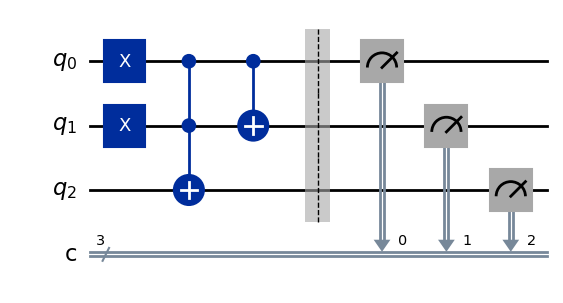

In [6]:
# Circuito va aquí
circuit = QuantumCircuit(3,3)
circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2)
circuit.cx(0, 1)
circuit.measure_all(True, False)
circuit.draw("mpl")

In [7]:
provider = IBMProvider()
backend = provider.get_backend('ibm_brisbane') # Aquí va el nombre de la QPU que nos proporcionan en la plataforma
# NOTA: en cada QPU tenemos una cant de shots por seg, y dependiendo de la cantidad de shots que usemos es la cant de tiempo que se va a tardar ejecutando
# NOTA: cada QPU tiene diferente margen de error, y tal vez diferente tipo de arquitectura de qubits

In [8]:
compiled = transpile(circuit, backend)
job = backend.run(compiled, shots = 500)
result = job.result()

{'001': 25, '011': 7, '110': 2, '010': 3, '111': 10, '101': 451, '100': 2}


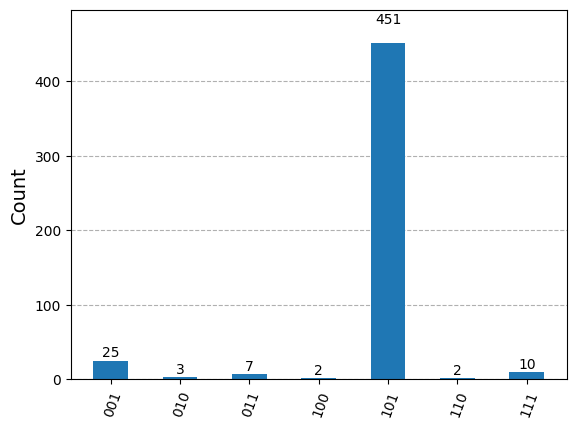

In [10]:
counts = result.get_counts()
print(counts)
plot_histogram(counts)